In [21]:
import pickle as pkl

file_dir1 = 'result/cnn_result/Time_pred_gap_slice_0_33_total_focal.pkl'
#file_dir1 = 'result/cnn_result/Time_pred_slice_1_52.pkl'
res_pred1 = []
with open(file_dir1, 'rb') as f1:
    data_1 = pkl.load(f1)
    for ele in data_1:
        for i in range(len(ele)):
            res_pred1.append(ele[i])
print(len(res_pred1))
#print(res_pred1[100000:110000])
print(res_pred1[0:100])

1068468
[0.4732335, 0.4677549, 0.46251974, 0.4579935, 0.45550233, 0.45287398, 0.4463955, 0.4335403, 0.43265712, 0.42058796, 0.42036164, 0.42165148, 0.4209439, 0.41669798, 0.42358667, 0.4252032, 0.4322701, 0.42712396, 0.429371, 0.4263803, 0.42303264, 0.42637202, 0.43054068, 0.43078414, 0.42942196, 0.42961413, 0.42976475, 0.43737423, 0.43464357, 0.43634558, 0.4407455, 0.43254688, 0.43308973, 0.42908835, 0.4281927, 0.42739856, 0.42557776, 0.43801978, 0.43094438, 0.42826888, 0.43251035, 0.42712685, 0.4333455, 0.44054562, 0.44615096, 0.43290094, 0.44031298, 0.4437173, 0.45807385, 0.44155616, 0.44348133, 0.4521837, 0.4642184, 0.45150238, 0.45208055, 0.44267216, 0.432154, 0.43841794, 0.4436254, 0.45318797, 0.45740533, 0.45328623, 0.44882277, 0.45947528, 0.44115117, 0.4415678, 0.44205847, 0.44793642, 0.44195575, 0.44289747, 0.4395975, 0.44081208, 0.436169, 0.41400725, 0.42157853, 0.41916683, 0.42868996, 0.42459407, 0.42221072, 0.42188558, 0.42222616, 0.42122373, 0.42521545, 0.43182254, 0.43900

In [3]:
file_dir2 = 'result/target_pred_33_res.pkl'
res_pred2 = []
with open(file_dir2, 'rb') as f2:
    data_2 = pkl.load(f2)
res_pred2 = data_2
print(len(res_pred2))

FileNotFoundError: [Errno 2] No such file or directory: 'result/target_pred_33_res.pkl'

In [4]:
file_dir2 = 'result/cnn_result/pred_target_merge_z_0_33.pkl'
res_pred2 = []
with open(file_dir2, 'rb') as f2:
    data_2 = pkl.load(f2)
    for ele in data_2:
        for i in range(len(ele)):
            res_pred2.append(ele[i])
print(len(res_pred2))

FileNotFoundError: [Errno 2] No such file or directory: 'result/cnn_result/pred_target_merge_z_0_33.pkl'

In [5]:
import pickle as pkl
file_dir2 = 'data/cnn_result_slice/merge_ng33sz_grid_28jun_154331.p701.ht'
res_pred2 = []
with open(file_dir2, 'rb') as f2:
    data_2 = pkl.load(f2)
    for ele in data_2:
        res_pred2.append(ele)
print(len(res_pred2))
print(res_pred2[100000:110000])

FileNotFoundError: [Errno 2] No such file or directory: 'data/cnn_result_slice/merge_ng33sz_grid_28jun_154331.p701.ht'

In [6]:
point_file = 'data/ng33sz_grid_28jun_154331.p701'
with open(point_file, 'r') as f:
    line = f.readline()
    count = 0
    cur_line_num = 629
    cur_cdp_num = 1190
    res = []
    while line and line != []:
        count += 1

        line_split = line[:-1].split(' ')
        line_split = [value for loc, value in enumerate(line_split) if value != '']
        line_num = int(line_split[4])
        cdp_num = int(line_split[3][:4])

        if cur_cdp_num == cdp_num and cur_line_num == line_num:
            if cur_cdp_num == 1851:
                cur_line_num += 1
                cur_cdp_num = 1190
            else:
                cur_cdp_num += 1
        else:
            # if cur_cdp_num == 1851:
            #     cur_line_num += 1
            #     cur_cdp_num = 1190
            # else:
            while cur_cdp_num != cdp_num:
                res.append(count - 1)
                #print(cur_line_num, cur_cdp_num, line_num, cdp_num)
                if cur_cdp_num == 1851:
                    cur_cdp_num = 1190
                    cur_line_num += 1
                else:
                    cur_cdp_num += 1
            if cur_cdp_num == 1851:
                cur_line_num += 1
                cur_cdp_num = 1190
            else:
                cur_cdp_num += 1
        line = f.readline()
    print(len(res))
    print(count)

for ele in res:
    res_pred2.insert(ele, 0)
print(len(res_pred2))

FileNotFoundError: [Errno 2] No such file or directory: 'data/ng33sz_grid_28jun_154331.p701'

In [7]:
import numpy as np

pred_1 = np.array(res_pred1)
pred_2 = np.array(res_pred2)

pred_merge = pred_1 + pred_2
#pred_merge = np.sqrt(pred_merge)
pred_merge = pred_merge/2
print(len(pred_merge))

ValueError: operands could not be broadcast together with shapes (1068468,) (0,) 

In [18]:
#pred_all = pred_merge
pred_all = res_pred1
cur_line_num = 629
cur_cdp_num = 1190
file_save = 'result/E2_52.txt'
with open(file_save, 'w') as fs:
    head = 'line '+'cdp '+'value'+'\n'
    fs.write(head)
    for i in range(len(pred_all)):
        cur_data = str(cur_line_num) + ' ' + str(cur_cdp_num) + ' ' + str(pred_all[i]) + '\n'
        fs.write(cur_data)
        if cur_cdp_num == 1851:
            cur_line_num += 1
            cur_cdp_num = 1190
        else:
            cur_cdp_num += 1
    print(cur_line_num)
    print(cur_cdp_num)

2243
1190


In [9]:
# test_a = pred_merge
pred_merge = []
for ele in test_a:
    if ele > 0.32:
        pred_merge.append(1)
    else:
        pred_merge.append(0)
print(len(pred_merge))

NameError: name 'test_a' is not defined

# 训练的时候用的line切片，测试用了time切片GG

(662, 1614)


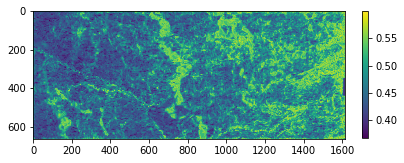

In [19]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)

In [14]:
#plt.savefig('image/E2+birnn_52.png', dpi=1000)
%matplotlib inline
print("lineslice result\n")
plt.show()

lineslice result



In [12]:
import pickle as pkl
with open("/disk3/zhao/oil_cnn_clean/data_prepare/mean_std.pkl", 'rb') as file:
        Cur_paras = pkl.load(file)
print(Cur_paras)

[1.1080261478506959, 466.37244638215867]


# 训练和测试都用line切片

In [31]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)

(662, 1614)


lineslice result



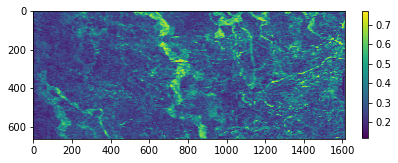

In [32]:
#plt.savefig('image/E2+birnn_52.png', dpi=1000)
print("lineslice result\n")
plt.show()

# 训练的时候用的cdp切片，测试用了time切片GG

In [25]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)

(662, 1614)


lineslice result



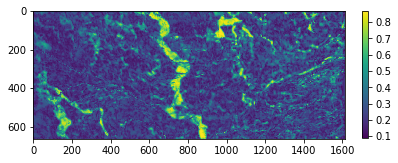

In [26]:
#plt.savefig('image/E2+birnn_52.png', dpi=1000)
print("lineslice result\n")
plt.show()

# 训练和测试都用cdp切片

In [28]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)

(662, 1614)


lineslice result



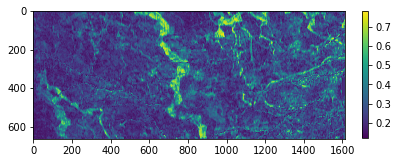

In [29]:
#plt.savefig('image/E2+birnn_52.png', dpi=1000)
print("lineslice result\n")
plt.show()

# 改模型后使用默认adam 训练测试都用CDP切片

In [34]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)

(662, 1614)


lineslice result



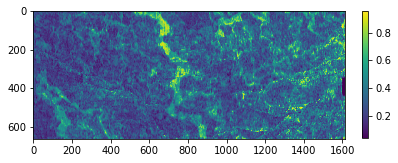

In [35]:
#plt.savefig('image/E2+birnn_52.png', dpi=1000)
print("lineslice result\n")
plt.show()

# Train in cdp,test in time

(662, 1614)


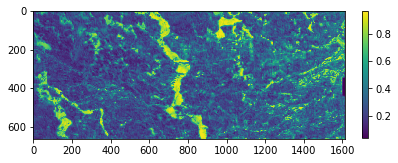

In [40]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)
plt.show()

(662, 1614)


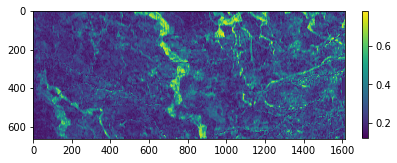

In [5]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)
plt.show()

In [7]:
[rows, cols] = pred.shape
print(rows, cols)
data=open("trainincdp.txt",'a+')
for i in range(rows):
    for j in range(cols):
        print(i+629,j+1190,pred[i, j],file=data)
        
data.close()

1614 662


(662, 1614)


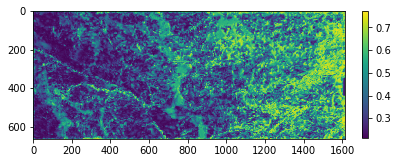

In [4]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)
plt.savefig("total_timetime.png")
plt.show()


(662, 1614)


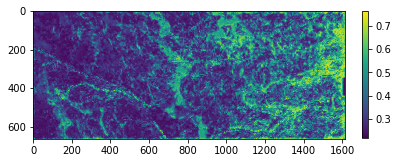

In [5]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)
plt.savefig("total_timetime_tune2.png")
plt.show()

(662, 1614)


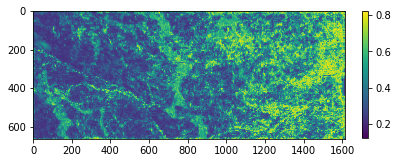

In [7]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)
plt.savefig("total_timetime_tune3.png")
plt.show()

(662, 1614)


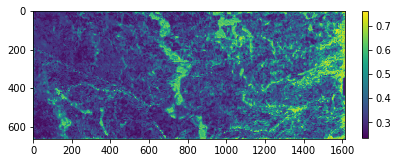

In [9]:
import numpy as np
pred_merge = res_pred1
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)
plt.savefig("total_timetime_tune4.png")
plt.show()